In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import tsgm
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import LSTM, Dense

import keras
import matplotlib.pyplot as plt


2024-02-20 17:45:32.429941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("NewTestDataCompiled.csv")
df.columns = ['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade", "Normal"]
display(df)
df["Normal"].value_counts()



,AmplitudePrimary,AmplitudeSecondary,Latency,CorrectiveSaccade,Normal
0,7.905335,0.907229,0.124998,7.0,0.0
1,17.381435,0.563108,0.341670,13.0,0.0
2,29.415535,1.097195,0.308346,16.0,0.0
3,10.173487,1.182019,0.175026,9.0,0.0
4,6.801426,7.733378,0.391700,28.0,0.0
...,...,...,...,...,...
238,10.272048,1.115520,0.275021,10.0,1.0
239,23.646621,6.660983,0.000025,16.0,1.0
240,6.281954,0.400970,0.091699,15.0,1.0
241,9.421117,0.646527,0.041703,30.0,1.0


Normal
0.0    137
1.0    106
Name: count, dtype: int64

# No Data Augmentation

In [50]:
y = df.Normal
X = df.drop('Normal', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

### Logsitic Regression

In [4]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6122448979591837
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.89      0.72        28
         1.0       0.62      0.24      0.34        21

    accuracy                           0.61        49
   macro avg       0.62      0.57      0.53        49
weighted avg       0.62      0.61      0.56        49



Logistic Regression Feature Importance:
Feature 1: 0.0022782205548882847
Feature 2: 0.021690157803236035
Feature 3: 0.8036872727818927
Feature 4: 0.023469277539925046


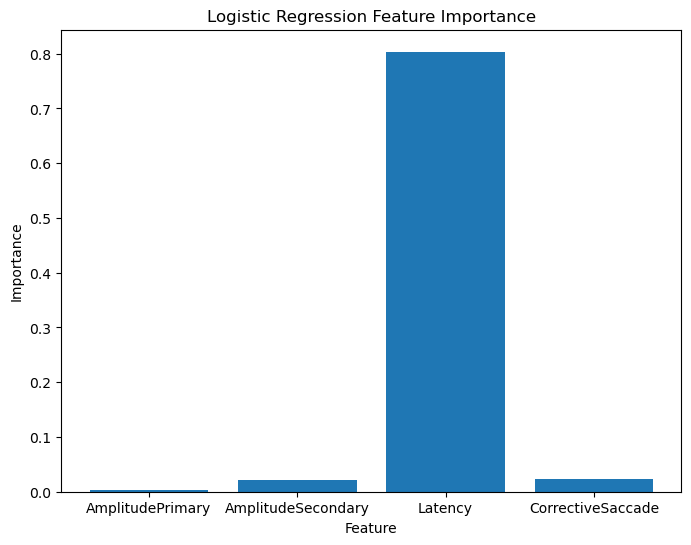

In [7]:
feature_importance_lr = np.abs(model.coef_[0])

print("Logistic Regression Feature Importance:")
for i, importance in enumerate(feature_importance_lr):
    print(f"Feature {i+1}: {importance}")

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance_lr)), feature_importance_lr, tick_label=['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade"])
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

{'importances_mean': array([0.02857143, 0.04897959, 0.06530612, 0.00816327]), 'importances_std': array([0.00999792, 0.02768298, 0.0237998 , 0.03315934]), 'importances': array([[ 0.02040816,  0.02040816,  0.04081633,  0.02040816,  0.04081633],
       [ 0.08163265,  0.06122449,  0.        ,  0.04081633,  0.06122449],
       [ 0.04081633,  0.06122449,  0.04081633,  0.10204082,  0.08163265],
       [-0.04081633,  0.04081633,  0.02040816,  0.04081633, -0.02040816]])}


Text(0.5, 0, 'Permutation Importance')

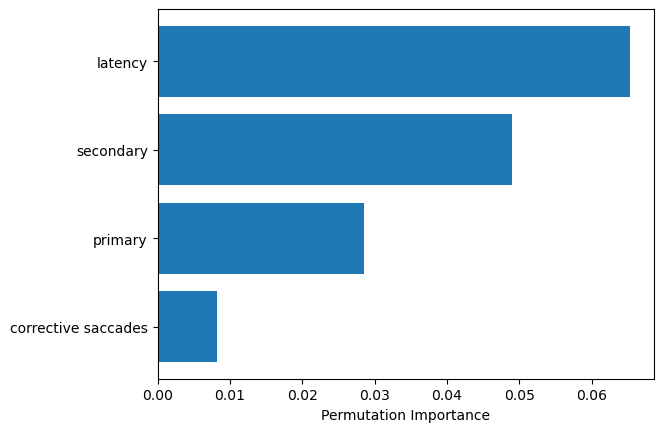

In [6]:
from sklearn.inspection import permutation_importance
%matplotlib inline

perm_importance = permutation_importance(model, X_test, y_test)
print(perm_importance)

feature_names = ['primary', 'secondary', 'latency', 'corrective saccades' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [8]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 300, min_samples_leaf = 4, min_samples_split = 10)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6326530612244898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69        28
         1.0       0.58      0.52      0.55        21

    accuracy                           0.63        49
   macro avg       0.62      0.62      0.62        49
weighted avg       0.63      0.63      0.63        49



Random Forest Feature Importance:
Feature 1: 0.2945193774862156
Feature 2: 0.268256409803188
Feature 3: 0.24630912464849036
Feature 4: 0.19091508806210605


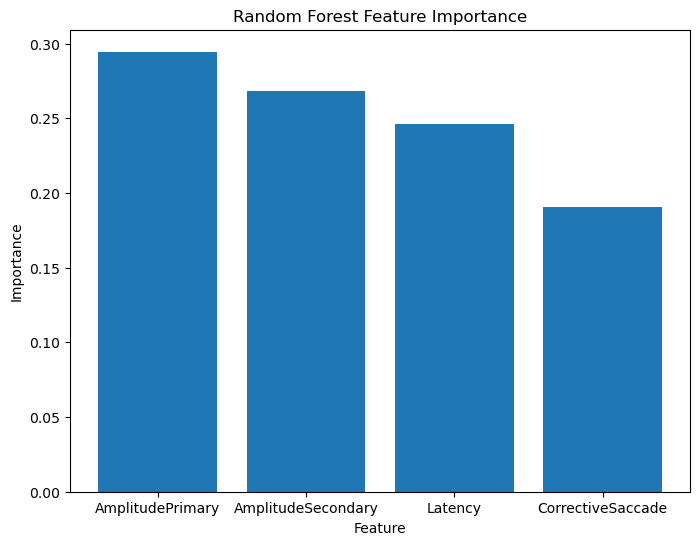

In [9]:
feature_importances_rf = model.feature_importances_

print("Random Forest Feature Importance:")
for i, importance in enumerate(feature_importances_rf):
    print(f"Feature {i+1}: {importance}")
# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances_rf)), feature_importances_rf, tick_label=['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade"])
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

{'importances_mean': array([ 0.05714286, -0.0122449 ,  0.07346939,  0.04897959]), 'importances_std': array([0.03265306, 0.04759961, 0.03558285, 0.01632653]), 'importances': array([[ 0.02040816,  0.08163265,  0.10204082,  0.06122449,  0.02040816],
       [ 0.02040816,  0.02040816, -0.02040816, -0.10204082,  0.02040816],
       [ 0.06122449,  0.02040816,  0.10204082,  0.06122449,  0.12244898],
       [ 0.06122449,  0.06122449,  0.02040816,  0.04081633,  0.06122449]])}


Text(0.5, 0, 'Permutation Importance')

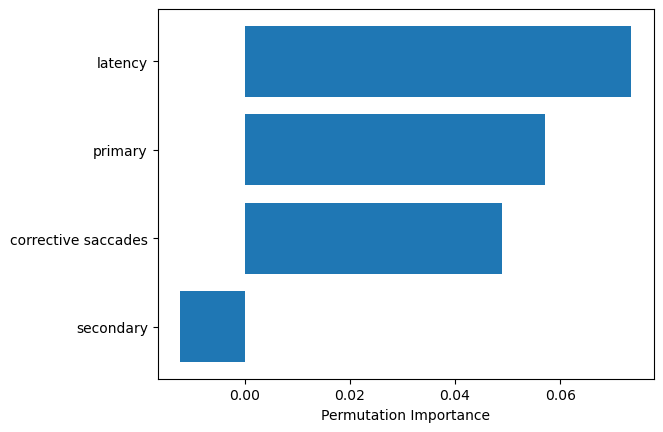

In [10]:
from sklearn.inspection import permutation_importance
%matplotlib inline

perm_importance = permutation_importance(model, X_test, y_test)
print(perm_importance)

feature_names = ['primary', 'secondary', 'latency', 'corrective saccades' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### SVM 

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


In [11]:
model = SVC(kernel='rbf', random_state=42, C = 0.1, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73        28
         1.0       0.00      0.00      0.00        21

    accuracy                           0.57        49
   macro avg       0.29      0.50      0.36        49
weighted avg       0.33      0.57      0.42        49



/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

{'importances_mean': array([0., 0., 0., 0.]), 'importances_std': array([0., 0., 0., 0.]), 'importances': array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])}


Text(0.5, 0, 'Permutation Importance')

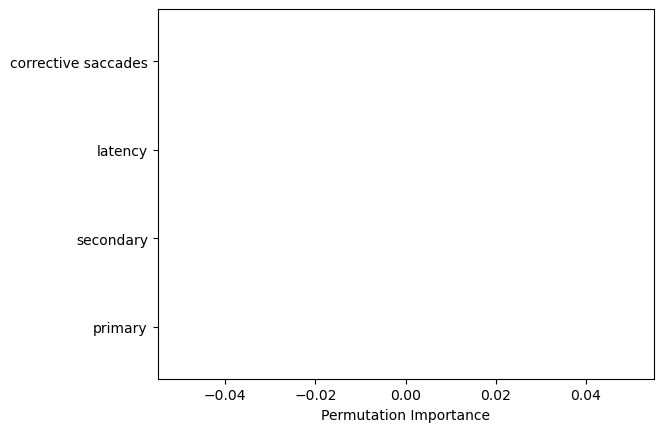

In [12]:
from sklearn.inspection import permutation_importance
%matplotlib inline

perm_importance = permutation_importance(model, X_test, y_test)
print(perm_importance)

feature_names = ['primary', 'secondary', 'latency', 'corrective saccades' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### simple neural network

In [51]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
39/39 [==============================] - 1s 5ms/step - loss: 0.7792 - accuracy: 0.5677 - val_loss: 0.7813 - val_accuracy: 0.4615
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6129 - val_loss: 0.7146 - val_accuracy: 0.5897
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.6000 - val_loss: 0.7781 - val_accuracy: 0.4872
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6387 - val_loss: 0.7420 - val_accuracy: 0.4872
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.5742 - val_loss: 0.7244 - val_accuracy: 0.4359
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.6387 - val_loss: 0.7434 - val_accuracy: 0.4872
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6516 - val_loss: 0.8940 - val_accuracy: 0.4103
Epoch 8/50
39/39 [==

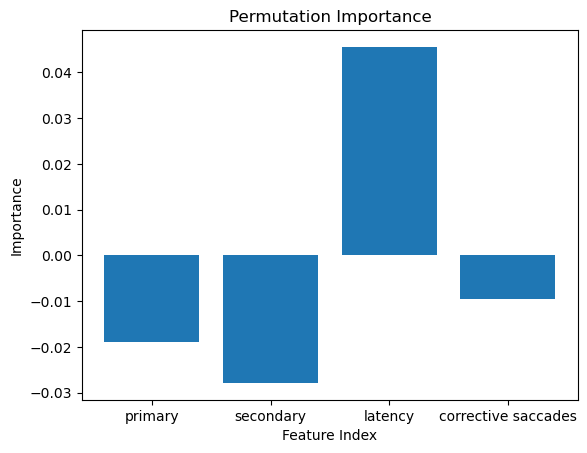

In [52]:

def custom_score(model, X, y):
    _, accuracy = model.evaluate(X, y, verbose=0)
    return accuracy

perm_importance = permutation_importance(model, X_test, y_test, scoring=custom_score, n_repeats=30, random_state=42)


# Plot feature importance
plt.bar(['primary', 'secondary', 'latency', 'corrective saccades' ], perm_importance.importances_mean)
plt.xticks(range(len(perm_importance.importances_mean)))
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Permutation Importance')
plt.show()


# Data Augmentation: Gaussain Noise 

In [47]:
def add_gaussian_noise(X, mean=0, std=0.1):
    noise = np.random.normal(mean, std, size=X.shape)
    return X + noise
# Example: Adding Gaussian noise with mean=0 and std=0.1
X_with_gaussian_noise = add_gaussian_noise(X)
X_augmented = pd.concat([X, X_with_gaussian_noise])
y_augmented = pd.concat([y,y])
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42, stratify = y_augmented)




### Logisitic Reg

In [17]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5306122448979592
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.69      0.62        55
         1.0       0.45      0.33      0.38        43

    accuracy                           0.53        98
   macro avg       0.51      0.51      0.50        98
weighted avg       0.52      0.53      0.52        98



Logistic Regression Feature Importance:
Feature 1: 0.0013478200158859404
Feature 2: 0.023535633756882
Feature 3: 1.2179087988591393
Feature 4: 0.030770902723379186


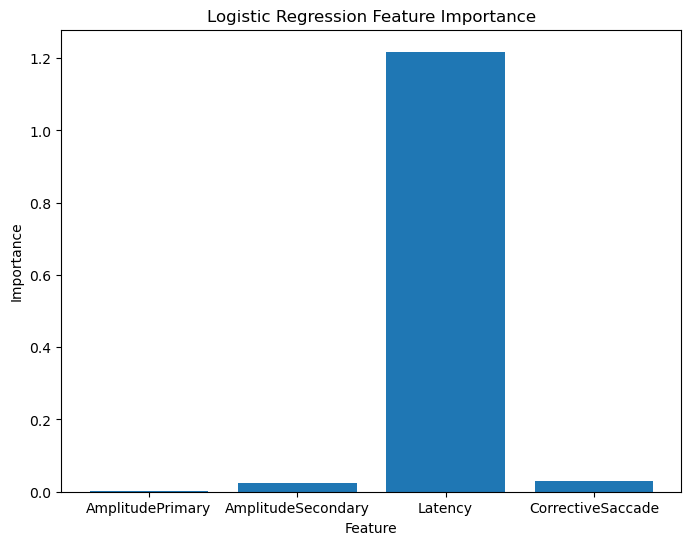

In [19]:
feature_importance_lr = np.abs(model.coef_[0])

print("Logistic Regression Feature Importance:")
for i, importance in enumerate(feature_importance_lr):
    print(f"Feature {i+1}: {importance}")

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance_lr)), feature_importance_lr, tick_label=['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade"])
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

{'importances_mean': array([-0.00408163, -0.03673469,  0.00204082, -0.02040816]), 'importances_std': array([0.0122449 , 0.00499896, 0.04202298, 0.03925589]), 'importances': array([[-0.02040816, -0.01020408, -0.01020408,  0.01020408,  0.01020408],
       [-0.04081633, -0.03061224, -0.04081633, -0.03061224, -0.04081633],
       [-0.04081633, -0.02040816,  0.08163265,  0.        , -0.01020408],
       [-0.04081633,  0.05102041, -0.06122449, -0.04081633, -0.01020408]])}


Text(0.5, 0, 'Permutation Importance')

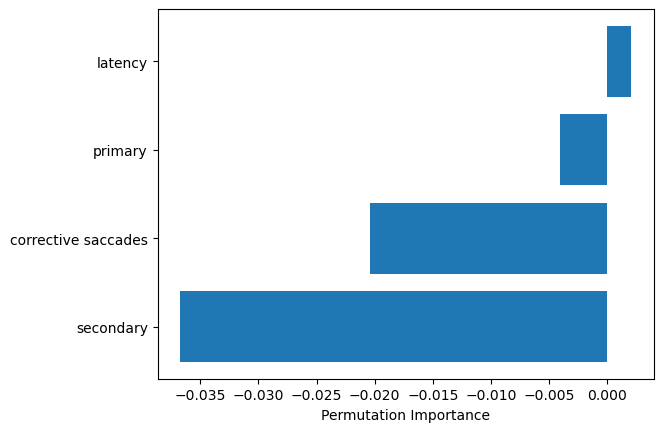

In [20]:
from sklearn.inspection import permutation_importance
%matplotlib inline

perm_importance = permutation_importance(model, X_test, y_test)
print(perm_importance)

feature_names = ['primary', 'secondary', 'latency', 'corrective saccades' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### RF

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [21]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 100, min_samples_leaf = 1, min_samples_split = 2)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8061224489795918
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83        55
         1.0       0.82      0.72      0.77        43

    accuracy                           0.81        98
   macro avg       0.81      0.80      0.80        98
weighted avg       0.81      0.81      0.80        98



Random Forest Feature Importance:
Feature 1: 0.29027456549384095
Feature 2: 0.2269166464019193
Feature 3: 0.22694582937043017
Feature 4: 0.2558629587338096


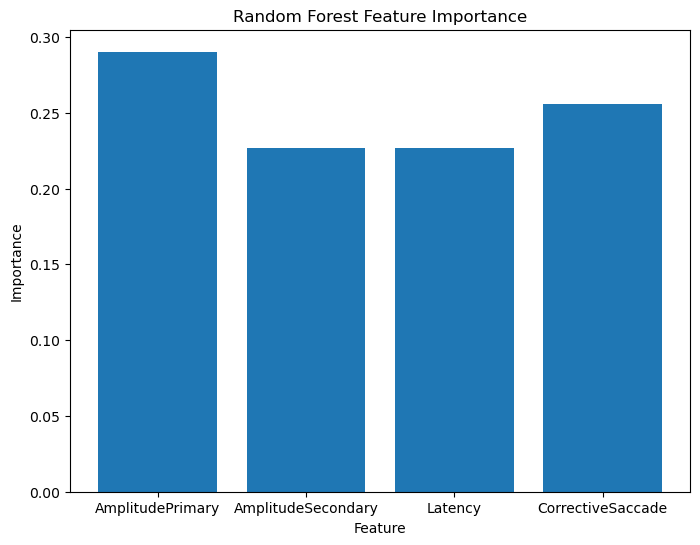

In [22]:
feature_importances_rf = model.feature_importances_

print("Random Forest Feature Importance:")
for i, importance in enumerate(feature_importances_rf):
    print(f"Feature {i+1}: {importance}")
# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances_rf)), feature_importances_rf, tick_label=['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade"])
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

{'importances_mean': array([0.16734694, 0.17142857, 0.16530612, 0.18979592]), 'importances_std': array([0.02783302, 0.02362416, 0.05056944, 0.01040616]), 'importances': array([[0.18367347, 0.14285714, 0.21428571, 0.15306122, 0.14285714],
       [0.16326531, 0.21428571, 0.16326531, 0.17346939, 0.14285714],
       [0.2244898 , 0.10204082, 0.1122449 , 0.17346939, 0.21428571],
       [0.17346939, 0.19387755, 0.19387755, 0.18367347, 0.20408163]])}


Text(0.5, 0, 'Permutation Importance')

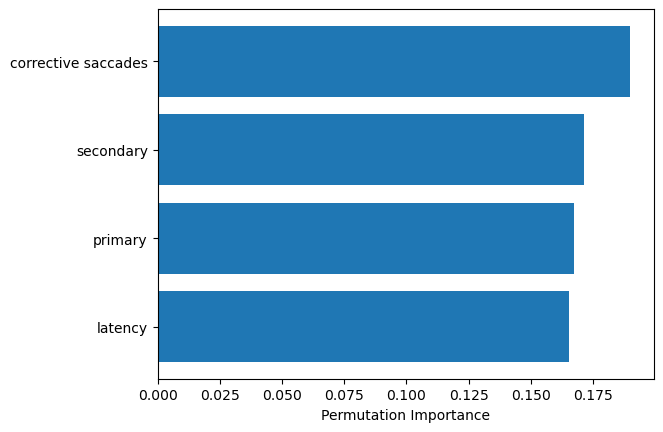

In [23]:
from sklearn.inspection import permutation_importance
%matplotlib inline

perm_importance = permutation_importance(model, X_test, y_test)
print(perm_importance)

feature_names = ['primary', 'secondary', 'latency', 'corrective saccades' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### SVM 

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [24]:
model = SVC(kernel='rbf', random_state=42, C = 10, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94        55
         1.0       0.95      0.88      0.92        43

    accuracy                           0.93        98
   macro avg       0.93      0.92      0.93        98
weighted avg       0.93      0.93      0.93        98



{'importances_mean': array([0.38571429, 0.22040816, 0.00204082, 0.35306122]), 'importances_std': array([0.03946751, 0.02465928, 0.00408163, 0.03265306]), 'importances': array([[0.43877551, 0.37755102, 0.36734694, 0.41836735, 0.32653061],
       [0.25510204, 0.20408163, 0.2244898 , 0.18367347, 0.23469388],
       [0.01020408, 0.        , 0.        , 0.        , 0.        ],
       [0.32653061, 0.39795918, 0.36734694, 0.30612245, 0.36734694]])}


Text(0.5, 0, 'Permutation Importance')

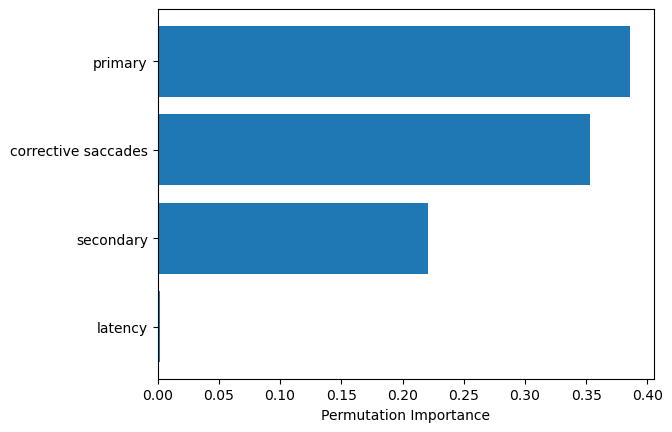

In [25]:
from sklearn.inspection import permutation_importance
%matplotlib inline

perm_importance = permutation_importance(model, X_test, y_test)
print(perm_importance)

feature_names = ['primary', 'secondary', 'latency', 'corrective saccades' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### simple neural network

In [48]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
78/78 [==============================] - 1s 3ms/step - loss: 0.8151 - accuracy: 0.5000 - val_loss: 0.6640 - val_accuracy: 0.5769
Epoch 2/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5419 - val_loss: 0.6565 - val_accuracy: 0.5897
Epoch 3/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6129 - val_loss: 0.7493 - val_accuracy: 0.5000
Epoch 4/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5839 - val_loss: 0.6525 - val_accuracy: 0.6282
Epoch 5/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5839 - val_loss: 0.6988 - val_accuracy: 0.5897
Epoch 6/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5774 - val_loss: 0.6221 - val_accuracy: 0.6154
Epoch 7/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5710 - val_loss: 0.6497 - val_accuracy: 0.6154
Epoch 8/50
78/78 [==

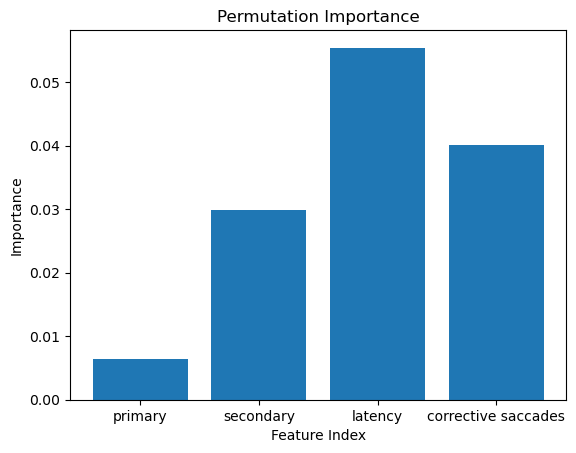

In [49]:

def custom_score(model, X, y):
    _, accuracy = model.evaluate(X, y, verbose=0)
    return accuracy

perm_importance = permutation_importance(model, X_test, y_test, scoring=custom_score, n_repeats=30, random_state=42)


# Plot feature importance
plt.bar(['primary', 'secondary', 'latency', 'corrective saccades' ], perm_importance.importances_mean)
plt.xticks(range(len(perm_importance.importances_mean)))
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Permutation Importance')
plt.show()


# Data Augmentation: Jittering

In [27]:
def add_jittering(X, magnitude=0.1):
    jitter = np.random.uniform(-magnitude, magnitude, size=X.shape)
    return X + jitter

# Example: Adding jittering with magnitude=0.1
X_with_jittering = add_jittering(X)

X_augmented = pd.concat([X, X_with_jittering])
y_augmented = pd.concat([y,y])
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42, stratify = y_augmented)



### Logisitic Reg

In [28]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5816326530612245
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67        55
         1.0       0.53      0.37      0.44        43

    accuracy                           0.58        98
   macro avg       0.57      0.56      0.55        98
weighted avg       0.57      0.58      0.57        98



Logistic Regression Feature Importance:
Feature 1: 6.629852282532471e-05
Feature 2: 0.02386980287170114
Feature 3: 1.140917649864345
Feature 4: 0.030238747045375575


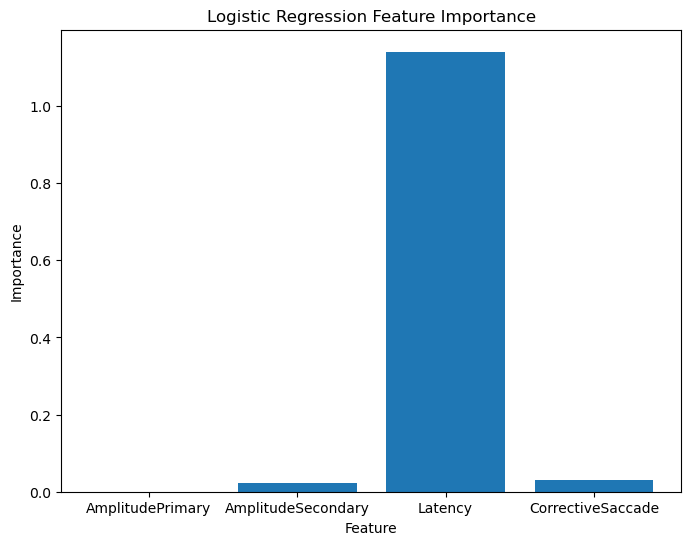

In [30]:
feature_importance_lr = np.abs(model.coef_[0])

print("Logistic Regression Feature Importance:")
for i, importance in enumerate(feature_importance_lr):
    print(f"Feature {i+1}: {importance}")

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance_lr)), feature_importance_lr, tick_label=['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade"])
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

{'importances_mean': array([ 0.        , -0.00204082,  0.06326531,  0.03061224]), 'importances_std': array([0.        , 0.0118999 , 0.02842528, 0.02738042]), 'importances': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.01020408,  0.01020408,  0.        , -0.01020408, -0.02040816],
       [ 0.06122449,  0.08163265,  0.09183673,  0.07142857,  0.01020408],
       [ 0.03061224,  0.        ,  0.06122449,  0.06122449,  0.        ]])}


Text(0.5, 0, 'Permutation Importance')

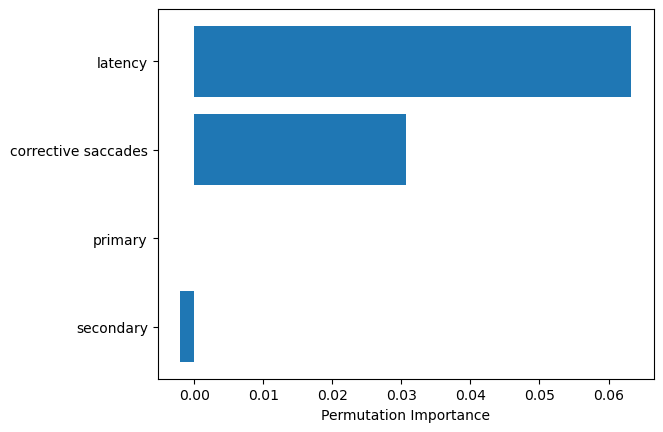

In [31]:
from sklearn.inspection import permutation_importance
%matplotlib inline

perm_importance = permutation_importance(model, X_test, y_test)
print(perm_importance)

feature_names = ['primary', 'secondary', 'latency', 'corrective saccades' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### RF

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [32]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 200, min_samples_leaf = 1, min_samples_split = 2)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8469387755102041
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86        55
         1.0       0.80      0.86      0.83        43

    accuracy                           0.85        98
   macro avg       0.84      0.85      0.85        98
weighted avg       0.85      0.85      0.85        98



Random Forest Feature Importance:
Feature 1: 0.28682393882686624
Feature 2: 0.24743715898163796
Feature 3: 0.21987306061270964
Feature 4: 0.2458658415787862


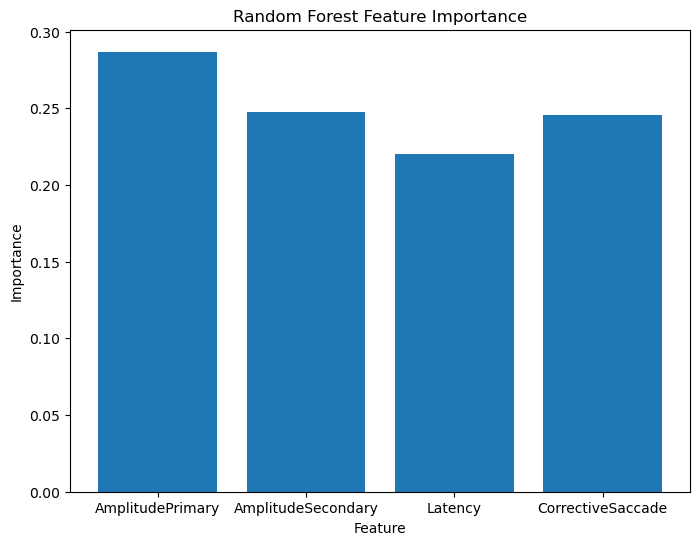

In [33]:
feature_importances_rf = model.feature_importances_

print("Random Forest Feature Importance:")
for i, importance in enumerate(feature_importances_rf):
    print(f"Feature {i+1}: {importance}")
# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances_rf)), feature_importances_rf, tick_label=['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade"])
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

{'importances_mean': array([0.2122449 , 0.18163265, 0.14897959, 0.14489796]), 'importances_std': array([0.03673469, 0.0378515 , 0.03265306, 0.03252526]), 'importances': array([[0.25510204, 0.23469388, 0.23469388, 0.16326531, 0.17346939],
       [0.13265306, 0.23469388, 0.21428571, 0.15306122, 0.17346939],
       [0.19387755, 0.16326531, 0.10204082, 0.16326531, 0.12244898],
       [0.1122449 , 0.18367347, 0.15306122, 0.10204082, 0.17346939]])}


Text(0.5, 0, 'Permutation Importance')

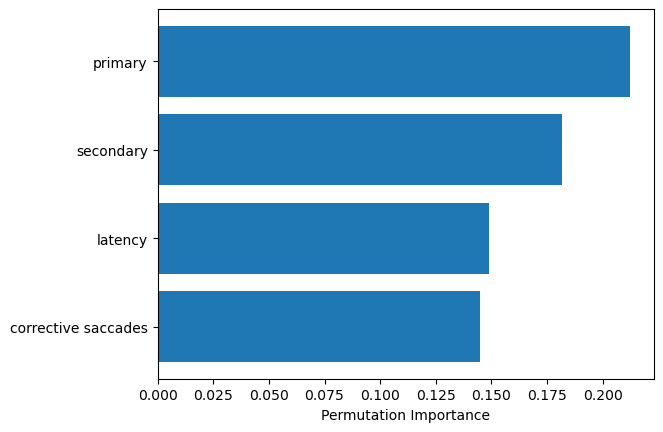

In [34]:
from sklearn.inspection import permutation_importance
%matplotlib inline

perm_importance = permutation_importance(model, X_test, y_test)
print(perm_importance)

feature_names = ['primary', 'secondary', 'latency', 'corrective saccades' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### SVM

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [35]:
model = SVC(kernel='rbf', random_state=42, C = 10, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9387755102040817
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        55
         1.0       0.95      0.91      0.93        43

    accuracy                           0.94        98
   macro avg       0.94      0.94      0.94        98
weighted avg       0.94      0.94      0.94        98



{'importances_mean': array([0.36326531, 0.26938776, 0.        , 0.35102041]), 'importances_std': array([0.03904312, 0.02629408, 0.        , 0.0237998 ]), 'importances': array([[0.29591837, 0.37755102, 0.40816327, 0.34693878, 0.3877551 ],
       [0.26530612, 0.2755102 , 0.2755102 , 0.30612245, 0.2244898 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33673469, 0.39795918, 0.33673469, 0.33673469, 0.34693878]])}


Text(0.5, 0, 'Permutation Importance')

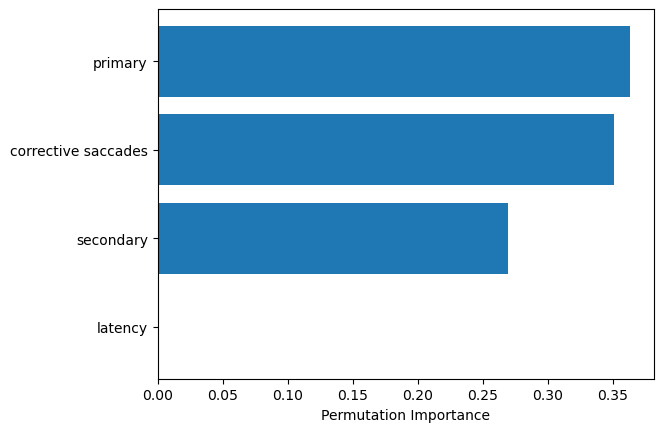

In [36]:
from sklearn.inspection import permutation_importance
%matplotlib inline

perm_importance = permutation_importance(model, X_test, y_test)
print(perm_importance)

feature_names = ['primary', 'secondary', 'latency', 'corrective saccades' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### simple neural network 

In [42]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
78/78 [==============================] - 1s 3ms/step - loss: 0.9077 - accuracy: 0.5226 - val_loss: 0.6538 - val_accuracy: 0.6154
Epoch 2/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.5871 - val_loss: 0.6452 - val_accuracy: 0.6282
Epoch 3/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5581 - val_loss: 0.6561 - val_accuracy: 0.5769
Epoch 4/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6065 - val_loss: 0.6344 - val_accuracy: 0.6410
Epoch 5/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.5935 - val_loss: 0.6539 - val_accuracy: 0.5769
Epoch 6/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6323 - val_loss: 0.6687 - val_accuracy: 0.5641
Epoch 7/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6423 - accuracy: 0.5968 - val_loss: 0.7320 - val_accuracy: 0.5641
Epoch 8/50
78/78 [==

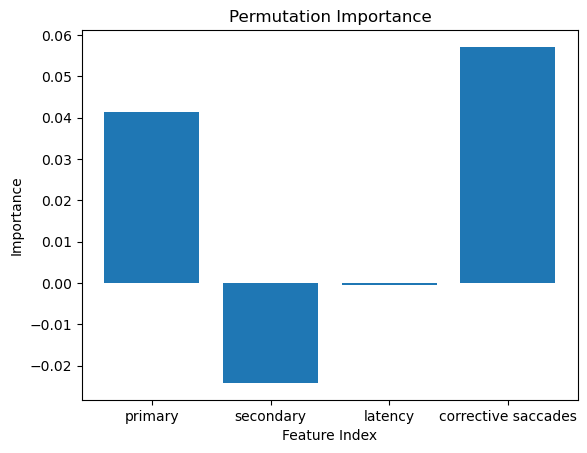

In [46]:

def custom_score(model, X, y):
    _, accuracy = model.evaluate(X, y, verbose=0)
    return accuracy

perm_importance = permutation_importance(model, X_test, y_test, scoring=custom_score, n_repeats=30, random_state=42)


# Plot feature importance
plt.bar(['primary', 'secondary', 'latency', 'corrective saccades' ], perm_importance.importances_mean)
plt.xticks(range(len(perm_importance.importances_mean)))
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Permutation Importance')
plt.show()


# Data Augmentation: GAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Generator network
def build_generator(latent_dim, num_features):
    model = keras.Sequential([
    layers.Dense(512, activation='relu', input_dim=latent_dim),  # Increase the number of neurons and depth
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),  # Increase the number of neurons and depth
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),  # Increase the number of neurons and depth
    layers.BatchNormalization(),
    layers.Dense(num_features, activation='sigmoid')
    ])
    return model

def build_discriminator(num_features):
    model = keras.Sequential([
        layers.Dense(1024, activation='relu', input_dim=num_features),  # Increase the number of neurons and depth
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),  # Increase the number of neurons and depth
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),  # Increase the number of neurons and depth
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.Sequential([generator, discriminator])
    return model

# Training GAN
def train_gan(generator, discriminator, gan, X_train, y_train, latent_dim, num_epochs=100, batch_size=32, logging_interval=1000, convergence_threshold=0.1, convergence_patience=5):
    best_discriminator_loss = float('inf')
    best_generator_loss = float('inf')
    patience_counter = 0
    
    for epoch in range(num_epochs):
        # Generate fake samples
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_data = generator.predict(noise)
        
        # Select a random batch of real samples
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_samples = X_train.iloc[idx]
        
        # Concatenate real and fake samples
        X = np.concatenate([real_samples, generated_data])
        
        # Labels for real and fake samples
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        y = np.concatenate([y_real, y_fake])
        
        # Train discriminator
        discriminator_loss = discriminator.train_on_batch(X, y)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = gan.train_on_batch(noise, y_real)
        
        # Logging
        if epoch % logging_interval == 0:
            print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")
        
        # Convergence monitoring
        if discriminator_loss < best_discriminator_loss - convergence_threshold and generator_loss < best_generator_loss - convergence_threshold:
            best_discriminator_loss = discriminator_loss
            best_generator_loss = generator_loss
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= convergence_patience:
            print(f"Convergence reached at epoch {epoch}")
            break

# Train GAN with convergence monitoring

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Generate synthetic samples
def generate_samples(generator, latent_dim, num_samples):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated_data = generator.predict(noise)
    return generated_data

# Load data
# Assuming your DataFrame is named df, and the target column is named 'abnormal'
# Drop the target column to get the feature data
# X = df.drop(columns=['normal']).values
# y = df['normal'].values.reshape(-1, 1)

# Split the data into training and testing sets

# Parameters
latent_dim = 100
num_features = X_train.shape[1]

# Build and compile models
generator = build_generator(latent_dim, num_features)
discriminator = build_discriminator(num_features)
gan = build_gan(generator, discriminator)
optimizer = Adam(learning_rate=0.0001)
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy')
# discriminator.compile(optimizer='adam', loss='binary_crossentropy')
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Train GAN
train_gan(generator, discriminator, gan, X_train, y_train, latent_dim)

# Generate samples
generated_samples = generate_samples(generator, latent_dim, 1000)

# Plot generated samples
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', alpha=0.5, label='Real Data')
# plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='red', alpha=0.5, label='Generated Data')
# plt.legend()
# plt.show()

display(generated_samples)


In [ ]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', alpha=0.5, label='Real Data')
plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='red', alpha=0.5, label='Generated Data')
plt.legend()
plt.show()